# 研究百度指数“居家”这一关键词对运动品牌股价的影响并根据百度指数构建出投资策略

#### 研究背景     
- 根据灼识咨询报告，2021年中国线上健身市场占中国整体健身市场的47.0%，预计2026年将占60.6%。最先出圈的是以Keep、悦动圈、每日瑜伽为代表的在线健身内容平台，它们以丰富的平台课程内容降低健身门槛，满足消费者个性化、高效的健身需求。此外，以刘畊宏为代表的“直播+健身”也成为热点。《抖音运动健身报告》显示，在2021年，抖音运动健身视频数量同比增长134%，创作者数同比增长39%；健身类主播涨粉同比增加208%，直播收入同比增加141%。2021快手健身新秀达人论坛也提到了一组数据，快手直播健身主播突破60万人，已拥有超1.5万名专注运动健身的达人，每天累计生产近2万多条短视频和1万多场直播。毫无疑问，居家健身正以惊人的速度改变着我们的生活。   
- 人们对居家工作生活时的舒适穿着及健身锻炼“行头”的需求增强，运动休闲服一时成为消费新宠。疫情推动运动休闲服消费需求走强，运动休闲服市场迎来新商机，这一势头在一些国家表现得尤为明显。2021年，美国运动服销售额达700亿美元，消费者服装开支迅速反弹并呈现新的增长趋势，预测未来5年的年增长率将达到9%。市场调查显示，疫情暴发后，韩国消费者对居家服、运动衣裤和紧身裤的消费较疫情前大幅增长，对运动休闲服的好感度也大幅提升，市场规模进一步扩大。英国一家市场研究机构的消费者调查研究发现，疫情期间英国运动服销量大涨，一半受访者购买了包括运动服在内的居家健身产品，76%的人计划在疫情结束后继续在家锻炼身体。俄罗斯运动服市场销售额在疫情暴发后的2021年重现升势，市场持续扩张，成为该国零售业发展的一大亮点。  
- 据业内人士分析，疫情及经济复苏催生运动服产业新业态，出现了消费需求及偏好转变、消费潮流更迭等趋势。预计疫情对民众生活方式的影响将持续一段时间。业内人士看好全球运动服消费增长预期，尤其是线上销售增长的大趋势将延续。运动服装业应把握疫情期间和后疫情时代的行业趋势，借此推动行业实现新发展。   
   一是愈加普及的“宅家”工作生活模式将推动运动休闲服消费需求增长。灵活弹性工作制导致工作与居家生活之间的界限逐渐模糊，很多职场人士已经习惯于穿着运动休闲服居家远程办公，预计未来职场着装要求将进一步宽松。   
   二是运动服与休闲服之间的界限趋于模糊并进一步结合，适合运动健身、旅游、办公、社交和外出购物等场合的全天候运动休闲服将成为着装新潮流。未来的运动服将进一步体现休闲和舒适特性。   
   
   
#### 研究意义       
研究该问题有利于各运动品牌了解居家运动市场的潜力，加快该赛道的布局

#### 数据源以及数据采集方法或程序
选择李宁、安踏、特步、361度这四个运动品牌作为研究对象，这四个品牌为中国运动服装市场的龙头，都选择在香港上市。  
研究时间区间为2019年12月至2022年5月  
数据来自Wind以及百度指数

## 获取知名运动品牌股票收盘价

In [1]:
#单位：港元
import pandas as pd
from WindPy import w
w.start()
data = w.wsd("2331.HK", "close", "2019-12-01", "2022-05-02", "TradingCalendar=HKEX") #李宁
df = pd.DataFrame(data.Data,columns=data.Times,index=data.Codes).T
df2331 = df
data = w.wsd("1361.HK", "close", "2019-12-01", "2022-05-02", "TradingCalendar=HKEX") #361度
df = pd.DataFrame(data.Data,columns=data.Times,index=data.Codes).T
df1361 = df
data = w.wsd("2020.HK", "close", "2019-12-01", "2022-05-02", "TradingCalendar=HKEX") #安踏体育
df = pd.DataFrame(data.Data,columns=data.Times,index=data.Codes).T
df2020 = df
data = w.wsd("1368.HK", "close", "2019-12-01", "2022-05-02", "TradingCalendar=HKEX") #特步国际
df = pd.DataFrame(data.Data,columns=data.Times,index=data.Codes).T
df1368 = df

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
df2331

,2331.HK
2019-12-02,25.60
2019-12-03,25.55
2019-12-04,24.80
2019-12-05,25.80
2019-12-06,26.10
...,...
2022-04-25,57.50
2022-04-26,59.05
2022-04-27,60.75
2022-04-28,59.95


## 爬取百度指数，关键词为“居家”

In [3]:
import requests
import sys
import time

word_url = 'https://index.baidu.com/Attention/isAtt?wordlist%5B0%5D=%E5%B1%85%E5%AE%B6'
COOKIES = ''
headers = {
        'Accept': 'application/json, text/plain, */*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'Connection': 'keep-alive',
        'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'Cookie': 'CHKFORREG=a621ac62a3af4077dc7593dbae1c716c; __yjs_duid=1_6cddb7c4b920bb042069e39729b19b001634299481944; PSTM=1634302339; BIDUPSID=C50C0BBA33BCBFEEC5384C7F15E27ED6; BAIDUID=F17D43B03BC7CCA48697AFF72A5B9645:FG=1; BDUSS=5aQjhkZn5RdHZ4dGVqM25ZY0FHNkhLRkdORFlhQkxHY0wzcC02M3JmbmdPSDlpRVFBQUFBJCQAAAAAAAAAAAEAAAAr8GZzSGkxQWxleHphbmRlcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOCrV2Lgq1diQ3; BDUSS_BFESS=5aQjhkZn5RdHZ4dGVqM25ZY0FHNkhLRkdORFlhQkxHY0wzcC02M3JmbmdPSDlpRVFBQUFBJCQAAAAAAAAAAAEAAAAr8GZzSGkxQWxleHphbmRlcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOCrV2Lgq1diQ3; Hm_up_d101ea4d2a5c67dab98251f0b5de24dc=%7B%22uid_%22%3A%7B%22value%22%3A%221936125995%22%2C%22scope%22%3A1%7D%7D; BAIDUID_BFESS=F17D43B03BC7CCA48697AFF72A5B9645:FG=1; Hm_lvt_d101ea4d2a5c67dab98251f0b5de24dc=1649912714,1651577514; bdindexid=dcqg4h70dvelp635a6j765hli6; Hm_lpvt_d101ea4d2a5c67dab98251f0b5de24dc=1651579144; ab_sr=1.0.1_YWM1NGUxMTFlNjVlZDJjZDA2OTM5YjMyYmE4OGIxMzhmOWJmNjIyNTI0Mjg3OTY3YTRhOTg4ZThjOGRkOTBlMjllODg0NWFmY2U1NTc4ODEyNDcyYTk4MjM3MmQxM2VjYjQ2NjZjY2NlOTU3MWFkY2QzZmI2MmJkYjE5OGNlYzg2MGFlZmYwNDZkZWYxYmVmNWY4NzA5MDFjMWNiOGNmNQ==; __yjs_st=2_MDc0ZmQ0MGZhYTQ2ZjVlMzY1ZDVlMzRmMjNiOTEzYzRkYWYxZDhkZTE4MzJjN2ZkZDM0YjNmOTVlYzVhZjAyNjRjN2UyODA1ZDExNzhiZWMwMTIzMjYxNTRhY2RjNTAwMDM4MzJlNTE5ZWVjZTg1MTM0ZTA2NTU1NjU4NmJkMWI5ODkwY2VkYWE1MTM2MjBhM2MzYjQwYjNkMzUwNWNkMGNlNTFhYTFhOTA3YjI2NTAyZjM2MTZkZmZkMDhkNTY5XzdfM2ZlNjk2MTk=; RT="z=1&dm=baidu.com&si=e9f95440-1918-4a16-aa23-b1362f2fd0a7&ss=l2q2moz9&sl=14&tt=3cm7&bcn=https%3A%2F%2Ffclog.baidu.com%2Flog%2Fweirwood%3Ftype%3Dperf&ld=13mi9"',
        'Host': 'index.baidu.com',
        'Referer': 'https://index.baidu.com/baidu-index-mobile/index.html',
        'sec-ch-ua': 'Not A;Brand";v="99", "Chromium";v="100", "Microsoft Edge";v="100"',
        'sec-ch-ua-mobile': '?1',
        'sec-ch-ua-platform': '"Android"',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-origin',
        'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Mobile Safari/537.36 Edg/100.0.1185.39',
        'X-Requested-With': 'XMLHttpRequest'
    }

def decrypt(t,e):
    n = list(t)
    i = list(e)
    a = {}
    result = []
    ln = int(len(n)/2)
    start = n[ln:]
    end = n[:ln]
    for j,k in zip(start, end):
        a.update({k: j})
    for j in e:
        result.append(a.get(j))
    return ''.join(result)
    

def get_ptbk(uniqid):
    url = 'https://index.baidu.com/Interface/api/ptbk?uniqid={}'
    resp = requests.get(url.format(uniqid), headers=headers)
    if resp.status_code != 200:
        print('获取uniqid失败')
        sys.exit(1)
    return resp.json().get('data')
    

def get_index_data(keyword, start='2019-12-01', end='2022-05-02'):
    keyword = str(keyword).replace("'", '"')
    url = f'http://index.baidu.com/api/SearchApi/index?area=0&word={keyword}&area=0&startDate={start}&endDate={end}'

    resp = requests.get(url, headers=headers)
    if resp.status_code != 200:
        print('获取指数失败')
        sys.exit(1)

    content = resp.json()
    data = content.get('data')
    user_indexes = data.get('userIndexes')[0]
    uniqid = data.get('uniqid')
    ptbk = get_ptbk(uniqid)

    while ptbk is None or ptbk == '':
        ptbk = get_ptbk(uniqid)

    all_data = user_indexes.get('all').get('data')
    result = decrypt(ptbk, all_data)
    result = result.split(',')

    print(result)
    

if __name__ == '__main__':
    words = [[{"name": "居家", "wordType": 1}]]
    cov = get_index_data(words)
    

['285', '279', '270', '261', '295', '275', '296', '251', '329', '567', '760', '727', '818', '963', '781', '680', '628', '555', '528', '501', '496', '481', '452', '451', '443', '386', '366', '365', '352', '351', '346', '326', '330', '322', '341', '356', '337', '297', '324', '396', '356', '314', '312', '311', '289', '313', '314', '293', '302', '298', '299', '313', '311', '301', '311', '314', '323', '319', '376', '439', '496', '463', '386', '318', '385', '420', '315', '301', '329', '338', '313', '316', '297', '286', '281', '287', '296', '294', '299', '319', '322', '298', '305', '300', '303', '308', '325', '370', '450', '409', '410', '433', '418', '340', '350', '339', '322', '328', '301', '316', '344', '402', '379', '332', '317', '316', '337', '366', '361', '335', '344', '403', '438', '421', '338', '455', '504', '454', '423', '598', '1119', '1001', '950', '860', '704', '580', '617', '519']


In [4]:
cov = ['285', '279', '270', '261', '295', '275', '296', '251', '329', '567', '760', '727', '818', '963', '781', '680', '628', '555', '528', '501', '496', '481', '452', '451', '443', '386', '366', '365', '352', '351', '346', '326', '330', '322', '341', '356', '337', '297', '324', '396', '356', '314', '312', '311', '289', '313', '314', '293', '302', '298', '299', '313', '311', '301', '311', '314', '323', '319', '376', '439', '496', '463', '386', '318', '385', '420', '315', '301', '329', '338', '313', '316', '297', '286', '281', '287', '296', '294', '299', '319', '322', '298', '305', '300', '303', '308', '325', '370', '450', '409', '410', '433', '418', '340', '350', '339', '322', '328', '301', '316', '344', '402', '379', '332', '317', '316', '337', '366', '361', '335', '344', '403', '438', '421', '338', '455', '504', '454', '423', '598', '1119', '1001', '950', '860', '704', '580', '617', '519']

In [5]:
len(cov)

128

In [6]:
date = pd.date_range(start='2019-11-25', end='2022-05-02', periods=128)

In [7]:
jujia = pd.DataFrame(cov,index=date)
jujia.columns = ['居家']
jujia = jujia.astype('float64')
jujia

,居家
2019-11-25,285.0
2019-12-02,279.0
2019-12-09,270.0
2019-12-16,261.0
2019-12-23,295.0
...,...
2022-04-04,860.0
2022-04-11,704.0
2022-04-18,580.0
2022-04-25,617.0


# 数据预处理和探索分析

对研究问题做数据预处理和探索分析（包括可视化），这一步骤是重点，期待该步骤能基本回答你的研究问题。

## 简单可视化股票收盘价与搜索指数

In [8]:
from datetime import datetime,date
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
%matplotlib inline
import seaborn as sns
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

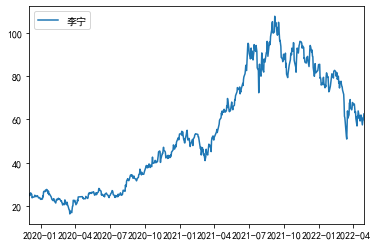

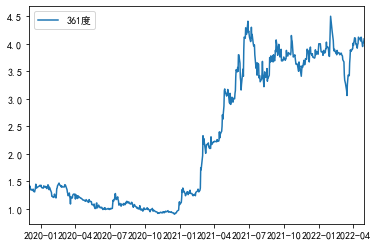

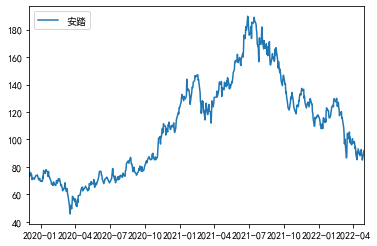

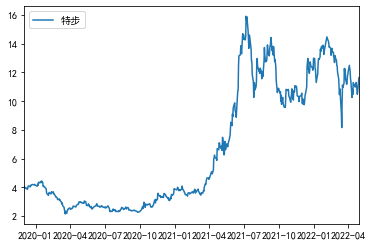

In [9]:
df2331.plot()
plt.legend(['李宁'], loc='upper left');
df1361.plot()
plt.legend(['361度'], loc='upper left');
df2020.plot()
plt.legend(['安踏'], loc='upper left');
df1368.plot()
plt.legend(['特步'], loc='upper left');

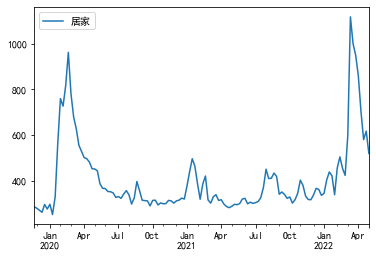

In [10]:
jujia.plot()

In [11]:
df = pd.merge(df1361,df1368,left_index=True,right_index=True,how = "left")

In [12]:
df = pd.merge(df,df2020,left_index=True,right_index=True,how = "left")
df = pd.merge(df,df2331,left_index=True,right_index=True,how = "left")
df = pd.merge(df,jujia,left_index=True,right_index=True,how = "left")

In [13]:
df = df.fillna(method='pad',axis=0)
df.columns = ['361度','特步','安踏','李宁','居家']

In [14]:
df

,361度,特步,安踏,李宁,居家
2019-12-02,1.43,4.04,73.85,25.60,279.0
2019-12-03,1.39,4.05,74.45,25.55,279.0
2019-12-04,1.41,3.93,73.20,24.80,279.0
2019-12-05,1.35,3.95,75.80,25.80,279.0
2019-12-06,1.36,3.94,75.95,26.10,279.0
...,...,...,...,...,...
2022-04-25,3.95,10.48,85.00,57.50,617.0
2022-04-26,4.02,10.68,86.80,59.05,617.0
2022-04-27,4.02,10.96,88.20,60.75,617.0
2022-04-28,4.04,11.32,89.00,59.95,617.0


## 相关性分析

In [15]:
df.corr()

,361度,特步,安踏,李宁,居家
361度,1.000000,0.962882,0.676263,0.895322,0.113100
特步,0.962882,1.000000,0.694100,0.906894,0.102525
安踏,0.676263,0.694100,1.000000,0.856284,-0.276143
李宁,0.895322,0.906894,0.856284,1.000000,-0.115538
居家,0.113100,0.102525,-0.276143,-0.115538,1.000000


C:\Users\24670\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\24670\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


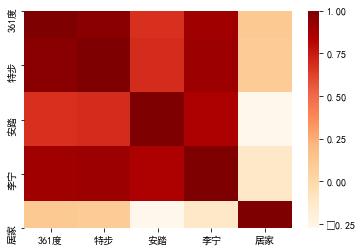

In [16]:
sns.heatmap(df.corr(),cmap="OrRd")

## 进行OLS回归分析

In [19]:
import statsmodels.api as sm

### 361度

In [20]:
x = np.array(df["居家"])
X = sm.add_constant(x)
y = np.array(df["361度"])
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     7.671
Date:                Wed, 04 May 2022   Prob (F-statistic):            0.00579
Time:                        13:25:19   Log-Likelihood:                -971.97
No. Observations:                 594   AIC:                             1948.
Df Residuals:                     592   BIC:                             1957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9569      0.136     14.434      0.000       1.691       2.223
x1             0.0009      0.000      2.770      0.006       0.000       0.001
==============================================================================
Omnibus:                     3043.856   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.255
Skew:                           0.267   Prob(JB):                     3.74e-18
Kurtosis:                       1.280   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

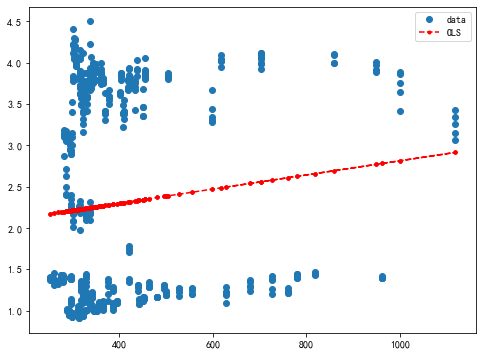

In [21]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

### 特步

In [22]:
x = np.array(df["居家"])
X = sm.add_constant(x)
y = np.array(df["特步"])
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.289
Date:                Wed, 04 May 2022   Prob (F-statistic):             0.0124
Time:                        13:25:22   Log-Likelihood:                -1709.2
No. Observations:                 594   AIC:                             3422.
Df Residuals:                     592   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6330      0.469     12.010      0.000       4.712       6.554
x1             0.0027      0.001      2.508      0.012       0.001       0.005
==============================================================================
Omnibus:                     3130.698   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.171
Skew:                           0.507   Prob(JB):                     3.51e-16
Kurtosis:                       1.641   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

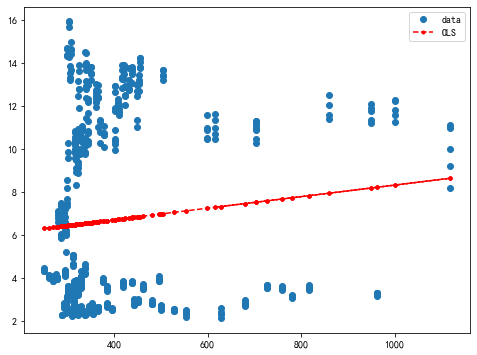

In [23]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

### 安踏

In [24]:
x = np.array(df["居家"])
X = sm.add_constant(x)
y = np.array(df["安踏"])
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     48.87
Date:                Wed, 04 May 2022   Prob (F-statistic):           7.40e-12
Time:                        13:25:24   Log-Likelihood:                -2936.7
No. Observations:                 594   AIC:                             5877.
Df Residuals:                     592   BIC:                             5886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.8836      3.704     35.874      0.000     125.609     140.159
x1            -0.0590      0.008     -6.991      0.000      -0.076      -0.042
==============================================================================
Omnibus:                      124.898   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.924
Skew:                           0.231   Prob(JB):                     3.18e-07
Kurtosis:                       2.003   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

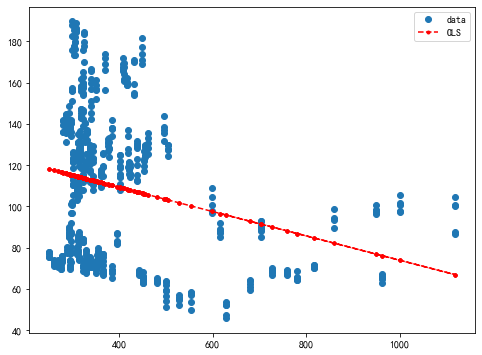

In [25]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

### 李宁

In [26]:
x = np.array(df["居家"])
X = sm.add_constant(x)
y = np.array(df["李宁"])
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.010
Date:                Wed, 04 May 2022   Prob (F-statistic):            0.00481
Time:                        13:25:26   Log-Likelihood:                -2772.1
No. Observations:                 594   AIC:                             5548.
Df Residuals:                     592   BIC:                             5557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4887      2.807     21.903      0.000      55.975      67.002
x1            -0.0181      0.006     -2.830      0.005      -0.031      -0.006
==============================================================================
Omnibus:                    11931.556   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.169
Skew:                           0.250   Prob(JB):                     1.05e-12
Kurtosis:                       1.593   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

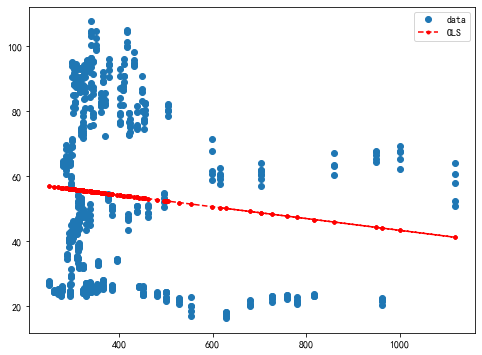

In [27]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

## 添加搜索指数滞后项进行回归分析

In [28]:
lags = 10
cols=  []
for lag in range(1,lags+1):
    col = "lag_{}".format(lag)
    df[col] = df["居家"].shift(lag)
    cols.append(col)

In [29]:
df.dropna(inplace=True)
df

,361度,特步,安踏,李宁,居家,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
2019-12-16,1.31,4.06,71.00,24.25,261.0,270.0,270.0,270.0,270.0,270.0,279.0,279.0,279.0,279.0,279.0
2019-12-17,1.35,4.05,72.10,25.00,261.0,261.0,270.0,270.0,270.0,270.0,270.0,279.0,279.0,279.0,279.0
2019-12-18,1.37,4.02,72.75,24.60,261.0,261.0,261.0,270.0,270.0,270.0,270.0,270.0,279.0,279.0,279.0
2019-12-19,1.45,4.13,73.10,24.50,261.0,261.0,261.0,261.0,270.0,270.0,270.0,270.0,270.0,279.0,279.0
2019-12-20,1.38,4.11,73.80,24.30,261.0,261.0,261.0,261.0,261.0,270.0,270.0,270.0,270.0,270.0,279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,3.95,10.48,85.00,57.50,617.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0,860.0,860.0
2022-04-26,4.02,10.68,86.80,59.05,617.0,617.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0,860.0
2022-04-27,4.02,10.96,88.20,60.75,617.0,617.0,617.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0
2022-04-28,4.04,11.32,89.00,59.95,617.0,617.0,617.0,617.0,704.0,704.0,704.0,704.0,704.0,704.0,704.0


In [30]:
X = df.loc[:,['居家','lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5','lag_6','lag_7','lag_8','lag_9','lag_10']].values

In [31]:
X.shape

(584, 11)

In [32]:
y = np.array(df["361度"])
y.shape

(584,)

In [33]:
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6361
Date:                Wed, 04 May 2022   Prob (F-statistic):              0.798
Time:                        13:25:37   Log-Likelihood:                -957.95
No. Observations:                 584   AIC:                             1940.
Df Residuals:                     572   BIC:                             1992.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9748      0.147     13.392      0.000       1.685       2.264
x1             0.0004      0.001      0.257      0.797      -0.002       0.003
x2            -0.0002      0.002     -0.115      0.908      -0.004       0.004
x3             0.0002      0.002      0.092      0.927      -0.004       0.004
x4           6.34e-05      0.002      0.031      0.975      -0.004       0.004
x5          9.003e-06      0.002      0.004      0.996      -0.004       0.004
x6          5.443e-05      0.002      0.027      0.979      -0.004       0.004
x7             0.0003      0.002      0.138      0.890      -0.004       0.004
x8             0.0002      0.002      0.089      0.929      -0.004       0.004
x9             0.0001      0.002      0.070      0.945      -0.004       0.004
x10        -2.007e-05      0.002     -0.010      0.992      -0.004       0.004
x11           -0.0002      0.001     -0.131      0.896      -0.003       0.003
==============================================================================
Omnibus:                     2919.383   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.214
Skew:                           0.233   Prob(JB):                     6.29e-18
Kurtosis:                       1.257   Cond. No.                     4.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 建模与分析

(如果没有该步骤可以删除）

### 361度

In [159]:
data_new = pd.merge(df1361,jujia,left_index=True,right_index=True,how = "left")
data_new = data_new.fillna(method='pad',axis=0)
data_new.rename({"1361.HK":"sport","居家":"sat"},axis=1,inplace=True)
by_month = data_new.groupby(data_new.index.month).mean()
data_new

,sport,sat
2019-12-02,1.43,279.0
2019-12-03,1.39,279.0
2019-12-04,1.41,279.0
2019-12-05,1.35,279.0
2019-12-06,1.36,279.0
...,...,...
2022-04-25,3.95,617.0
2022-04-26,4.02,617.0
2022-04-27,4.02,617.0
2022-04-28,4.04,617.0


In [181]:
# 生成一列计算七期的移动均值：sat_mavg
data_new["sat_mavg"] = data_new.sat.rolling(window=7).mean()

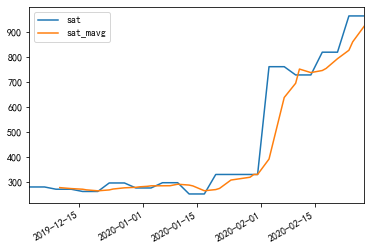

In [182]:
data_new.loc[:'2020-03-01',['sat','sat_mavg']].plot()

In [183]:
# shift the moving average timeseries （sat_mavg） forward by one
data_new["sat_mavg"] = data_new["sat_mavg"].shift(1)

In [184]:
# 生成order信号
data_new['order'] = 0
# Short if search volume goes up relative to mavg.
data_new.loc[data_new.sat > data_new.sat_mavg,['order']] = -1

# Long if search volume goes down relative to mavg.
data_new.loc[data_new.sat < data_new.sat_mavg,['order']] = 1

In [185]:
data_new['ret_sport'] = data_new['sport'].pct_change()

In [186]:
# 生成ret__shift：adjust by shifting the returns upward
data_new['ret_sport_shift'] = data_new['ret_sport'].shift(-1)
# Compute returns of our strategy
data_new['ret_Baidu'] = data_new.order * data_new['ret_sport_shift']
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,1.43,279.0,NaN,0,NaN,-0.027972,-0.000000
2019-12-03,1.39,279.0,NaN,0,-0.027972,0.014388,0.000000
2019-12-04,1.41,279.0,NaN,0,0.014388,-0.042553,-0.000000
2019-12-05,1.35,279.0,NaN,0,-0.042553,0.007407,0.000000
2019-12-06,1.36,279.0,NaN,0,0.007407,-0.014706,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,3.95,617.0,704.000000,1,-0.036585,0.017722,0.017722
2022-04-26,4.02,617.0,691.571429,1,0.017722,0.000000,0.000000
2022-04-27,4.02,617.0,679.142857,1,0.000000,0.004975,0.004975
2022-04-28,4.04,617.0,666.714286,1,0.004975,0.012376,0.012376


Text(0.5, 1.0, '361度')

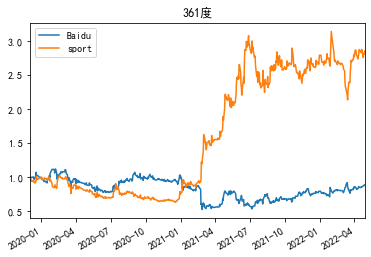

In [187]:
# 生成累积的收益图
(1+data_new.ret_Baidu).cumprod().plot()
(1+data_new.ret_sport).cumprod().plot()
plt.legend(['Baidu','sport'], loc='upper left')
plt.title('361度')

### 特步

In [188]:
data_new = pd.merge(df1368,jujia,left_index=True,right_index=True,how = "left")
data_new = data_new.fillna(method='pad',axis=0)
data_new.rename({"1368.HK":"sport","居家":"sat"},axis=1,inplace=True)
by_month = data_new.groupby(data_new.index.month).mean()
data_new

,sport,sat
2019-12-02,4.04,279.0
2019-12-03,4.05,279.0
2019-12-04,3.93,279.0
2019-12-05,3.95,279.0
2019-12-06,3.94,279.0
...,...,...
2022-04-25,10.48,617.0
2022-04-26,10.68,617.0
2022-04-27,10.96,617.0
2022-04-28,11.32,617.0


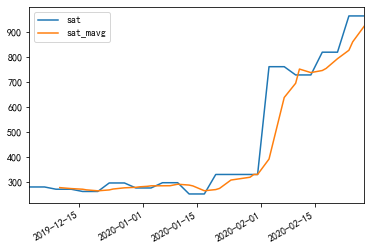

In [195]:
# 生成一列计算七期的移动均值：sat_mavg
data_new["sat_mavg"] = data_new.sat.rolling(window=7).mean()
data_new.loc[:'2020-03-01',['sat','sat_mavg']].plot()

In [196]:
# shift the moving average timeseries （sat_mavg） forward by one
data_new["sat_mavg"] = data_new["sat_mavg"].shift(1)
# 生成order信号
data_new['order'] = 0
# Short if search volume goes up relative to mavg.
data_new.loc[data_new.sat > data_new.sat_mavg,['order']] = -1

# Long if search volume goes down relative to mavg.
data_new.loc[data_new.sat < data_new.sat_mavg,['order']] = 1

data_new['ret_sport'] = data_new['sport'].pct_change()

# 生成ret__shift：adjust by shifting the returns upward
data_new['ret_sport_shift'] = data_new['ret_sport'].shift(-1)
# Compute returns of our strategy
data_new['ret_Baidu'] = data_new.order * data_new['ret_sport_shift']
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,4.04,279.0,NaN,0,NaN,0.002475,0.000000
2019-12-03,4.05,279.0,NaN,0,0.002475,-0.029630,-0.000000
2019-12-04,3.93,279.0,NaN,0,-0.029630,0.005089,0.000000
2019-12-05,3.95,279.0,NaN,0,0.005089,-0.002532,-0.000000
2019-12-06,3.94,279.0,NaN,0,-0.002532,-0.002538,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,10.48,617.0,704.000000,1,-0.072566,0.019084,0.019084
2022-04-26,10.68,617.0,691.571429,1,0.019084,0.026217,0.026217
2022-04-27,10.96,617.0,679.142857,1,0.026217,0.032847,0.032847
2022-04-28,11.32,617.0,666.714286,1,0.032847,0.028269,0.028269


Text(0.5, 1.0, '特步')

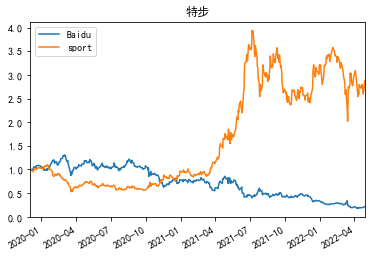

In [197]:
# 生成累积的收益图
(1+data_new.ret_Baidu).cumprod().plot()
(1+data_new.ret_sport).cumprod().plot()
plt.legend(['Baidu','sport'], loc='upper left')
plt.title('特步')

### 李宁

In [198]:
data_new = pd.merge(df2331,jujia,left_index=True,right_index=True,how = "left")
data_new = data_new.fillna(method='pad',axis=0)
data_new.rename({"2331.HK":"sport","居家":"sat"},axis=1,inplace=True)
by_month = data_new.groupby(data_new.index.month).mean()
data_new

,sport,sat
2019-12-02,25.60,279.0
2019-12-03,25.55,279.0
2019-12-04,24.80,279.0
2019-12-05,25.80,279.0
2019-12-06,26.10,279.0
...,...,...
2022-04-25,57.50,617.0
2022-04-26,59.05,617.0
2022-04-27,60.75,617.0
2022-04-28,59.95,617.0


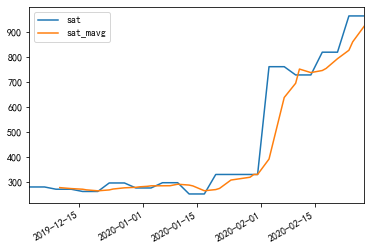

In [208]:
# 生成一列计算七期的移动均值：sat_mavg
data_new["sat_mavg"] = data_new.sat.rolling(window=7).mean()
data_new.loc[:'2020-03-01',['sat','sat_mavg']].plot()

In [209]:
# shift the moving average timeseries （sat_mavg） forward by one
data_new["sat_mavg"] = data_new["sat_mavg"].shift(1)
# 生成order信号
data_new['order'] = 0
# Short if search volume goes up relative to mavg.
data_new.loc[data_new.sat > data_new.sat_mavg,['order']] = -1

# Long if search volume goes down relative to mavg.
data_new.loc[data_new.sat < data_new.sat_mavg,['order']] = 1

data_new['ret_sport'] = data_new['sport'].pct_change()

# 生成ret__shift：adjust by shifting the returns upward
data_new['ret_sport_shift'] = data_new['ret_sport'].shift(-1)
# Compute returns of our strategy
data_new['ret_Baidu'] = data_new.order * data_new['ret_sport_shift']
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,25.60,279.0,NaN,0,NaN,-0.001953,-0.000000
2019-12-03,25.55,279.0,NaN,0,-0.001953,-0.029354,-0.000000
2019-12-04,24.80,279.0,NaN,0,-0.029354,0.040323,0.000000
2019-12-05,25.80,279.0,NaN,0,0.040323,0.011628,0.000000
2019-12-06,26.10,279.0,NaN,0,0.011628,-0.026820,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,57.50,617.0,704.000000,1,-0.072581,0.026957,0.026957
2022-04-26,59.05,617.0,691.571429,1,0.026957,0.028789,0.028789
2022-04-27,60.75,617.0,679.142857,1,0.028789,-0.013169,-0.013169
2022-04-28,59.95,617.0,666.714286,1,-0.013169,0.043369,0.043369


Text(0.5, 1.0, '李宁')

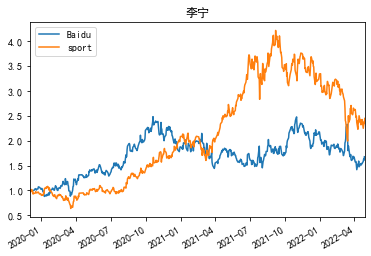

In [210]:
# 生成累积的收益图
(1+data_new.ret_Baidu).cumprod().plot()
(1+data_new.ret_sport).cumprod().plot()
plt.legend(['Baidu','sport'], loc='upper left')
plt.title('李宁')

### 安踏

In [127]:
data_new = pd.merge(df2020,jujia,left_index=True,right_index=True,how = "left")
data_new = data_new.fillna(method='pad',axis=0)
data_new.rename({"2020.HK":"sport","居家":"sat"},axis=1,inplace=True)
by_month = data_new.groupby(data_new.index.month).mean()
data_new

,sport,sat
2019-12-02,73.85,279.0
2019-12-03,74.45,279.0
2019-12-04,73.20,279.0
2019-12-05,75.80,279.0
2019-12-06,75.95,279.0
...,...,...
2022-04-25,85.00,617.0
2022-04-26,86.80,617.0
2022-04-27,88.20,617.0
2022-04-28,89.00,617.0


In [152]:
# 生成一列计算七期的移动均值：sat_mavg
data_new["sat_mavg"] = data_new.sat.rolling(window=7).mean()
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,73.85,279.0,NaN,0,NaN,0.008125,0.000000
2019-12-03,74.45,279.0,NaN,0,0.008125,-0.016790,-0.000000
2019-12-04,73.20,279.0,NaN,0,-0.016790,0.035519,0.000000
2019-12-05,75.80,279.0,NaN,0,0.035519,0.001979,0.000000
2019-12-06,75.95,279.0,NaN,0,0.001979,-0.026333,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,85.00,617.0,691.571429,1,-0.082569,0.021176,0.021176
2022-04-26,86.80,617.0,679.142857,1,0.021176,0.016129,0.016129
2022-04-27,88.20,617.0,666.714286,1,0.016129,0.009070,0.009070
2022-04-28,89.00,617.0,654.285714,0,0.009070,0.032022,0.000000


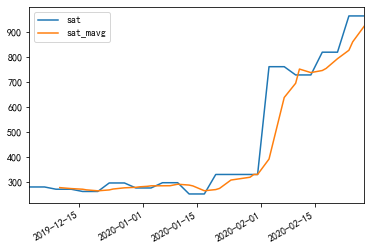

In [153]:
data_new.loc[:'2020-03-01',['sat','sat_mavg']].plot()

In [154]:
# shift the moving average timeseries （sat_mavg） forward by one
data_new["sat_mavg"] = data_new["sat_mavg"].shift(1)
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,73.85,279.0,NaN,0,NaN,0.008125,0.000000
2019-12-03,74.45,279.0,NaN,0,0.008125,-0.016790,-0.000000
2019-12-04,73.20,279.0,NaN,0,-0.016790,0.035519,0.000000
2019-12-05,75.80,279.0,NaN,0,0.035519,0.001979,0.000000
2019-12-06,75.95,279.0,NaN,0,0.001979,-0.026333,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,85.00,617.0,704.000000,1,-0.082569,0.021176,0.021176
2022-04-26,86.80,617.0,691.571429,1,0.021176,0.016129,0.016129
2022-04-27,88.20,617.0,679.142857,1,0.016129,0.009070,0.009070
2022-04-28,89.00,617.0,666.714286,0,0.009070,0.032022,0.000000


In [155]:
# 生成order信号
data_new['order'] = 0
# Short if search volume goes up relative to mavg.
data_new.loc[data_new.sat > data_new.sat_mavg,['order']] = -1

# Long if search volume goes down relative to mavg.
data_new.loc[data_new.sat < data_new.sat_mavg,['order']] = 1
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,73.85,279.0,NaN,0,NaN,0.008125,0.000000
2019-12-03,74.45,279.0,NaN,0,0.008125,-0.016790,-0.000000
2019-12-04,73.20,279.0,NaN,0,-0.016790,0.035519,0.000000
2019-12-05,75.80,279.0,NaN,0,0.035519,0.001979,0.000000
2019-12-06,75.95,279.0,NaN,0,0.001979,-0.026333,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,85.00,617.0,704.000000,1,-0.082569,0.021176,0.021176
2022-04-26,86.80,617.0,691.571429,1,0.021176,0.016129,0.016129
2022-04-27,88.20,617.0,679.142857,1,0.016129,0.009070,0.009070
2022-04-28,89.00,617.0,666.714286,1,0.009070,0.032022,0.000000


In [156]:
data_new['ret_sport'] = data_new['sport'].pct_change()
print(data_new[["sport","ret_sport","order"]].head(15))

            sport  ret_sport  order
2019-12-02  73.85        NaN      0
2019-12-03  74.45   0.008125      0
2019-12-04  73.20  -0.016790      0
2019-12-05  75.80   0.035519      0
2019-12-06  75.95   0.001979      0
2019-12-09  73.95  -0.026333      0
2019-12-10  70.75  -0.043272      0
2019-12-11  72.00   0.017668      1
2019-12-12  72.00   0.000000      1
2019-12-13  71.90  -0.001389      1
2019-12-16  71.00  -0.012517      1
2019-12-17  72.10   0.015493      1
2019-12-18  72.75   0.009015      1
2019-12-19  73.10   0.004811      1
2019-12-20  73.80   0.009576      1


In [157]:
# 生成ret__shift：adjust by shifting the returns upward
data_new['ret_sport_shift'] = data_new['ret_sport'].shift(-1)
# Compute returns of our strategy
data_new['ret_Baidu'] = data_new.order * data_new['ret_sport_shift']
data_new

,sport,sat,sat_mavg,order,ret_sport,ret_sport_shift,ret_Baidu
2019-12-02,73.85,279.0,NaN,0,NaN,0.008125,0.000000
2019-12-03,74.45,279.0,NaN,0,0.008125,-0.016790,-0.000000
2019-12-04,73.20,279.0,NaN,0,-0.016790,0.035519,0.000000
2019-12-05,75.80,279.0,NaN,0,0.035519,0.001979,0.000000
2019-12-06,75.95,279.0,NaN,0,0.001979,-0.026333,-0.000000
...,...,...,...,...,...,...,...
2022-04-25,85.00,617.0,704.000000,1,-0.082569,0.021176,0.021176
2022-04-26,86.80,617.0,691.571429,1,0.021176,0.016129,0.016129
2022-04-27,88.20,617.0,679.142857,1,0.016129,0.009070,0.009070
2022-04-28,89.00,617.0,666.714286,1,0.009070,0.032022,0.032022


Text(0.5, 1.0, '安踏')

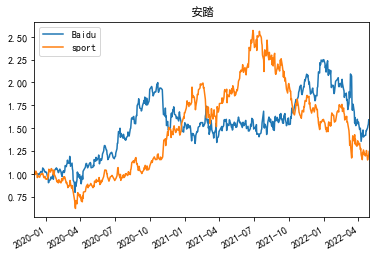

In [158]:
# 生成累积的收益图
(1+data_new.ret_Baidu).cumprod().plot()
(1+data_new.ret_sport).cumprod().plot()
plt.legend(['Baidu','sport'], loc='upper left')
plt.title('安踏')

# 结论

- “居家”百度指数在2020年2月以及2022年3月出现极大值。四个运动品牌在2020年的股价较低，其中361度全年处于下降趋势，李宁、安踏处于上升趋势，特步全年股价较平稳；四家运动品牌股价近两年的最大值均处于2021年中，李宁、安踏在达到最大值之后至今均处于下降趋势，361度、特步在2021、2022年的股价波动剧烈。  
- 相关性分析：“居家”百度指数与四个运动品牌的股价的相关系数均较小，其中与361度、特步的相关系数均大约为0.1；与安踏、李宁的相关系数为负值，与李宁的相关系数约为-0.12，与安踏的相关系数绝对值最大，约为0.28。  
- OLS回归分析：百度指数与四个运动品牌的股价的R-squared均很低，说明拟合程度很低；但P值均很小，表面即使杂乱的，变异较大的数据也可以有一个显著性趋势，即使数据点落在远离回归线的位置，自变量扔提供了关于因变量的信息。   
- 对百度指数滞后项的研究：根据一般经济现象，猜测“居家”百度搜索指数对运动品牌股价的影响具有滞后效应，因此添加了搜索指数的滞后项再次进行了OLS回归分析。回归结果的P值很大，R-squared很小，表面搜索指数滞后项与股价并没有显著相关性。  
- 根据搜索指数构建了单一股票的投资策略，其中计算移动均值选择的窗口均为7天。结果表明，四个股票的构建策略在2020年的收益率表现均优于股票自身收益率；但在2021年之后的收益表现大幅度差于股票自身收益率，其中只有基于安踏构建的投资策略的收益表现在2021年10月份之后至今优于股票自身。  
该结果说明在疫情前期根据“居家”百度指数构建的投资策略是有效的，在后疫情时期的收益表现较差，猜测是因为疫情后期各地区的居家隔离情况较复杂，居家隔离对于运动品牌股价的影响无法单纯概括为居家的搜索频次（即居家的人数），还有其他的影响因素。  